# Matplotlib Advanced Concepts

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.special

x = np.arange(1, 5, 0.1)
x

array([ 1. ,  1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,
        2.1,  2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,
        3.2,  3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,
        4.3,  4.4,  4.5,  4.6,  4.7,  4.8,  4.9])

In [2]:
x**2

array([  1.  ,   1.21,   1.44,   1.69,   1.96,   2.25,   2.56,   2.89,
         3.24,   3.61,   4.  ,   4.41,   4.84,   5.29,   5.76,   6.25,
         6.76,   7.29,   7.84,   8.41,   9.  ,   9.61,  10.24,  10.89,
        11.56,  12.25,  12.96,  13.69,  14.44,  15.21,  16.  ,  16.81,
        17.64,  18.49,  19.36,  20.25,  21.16,  22.09,  23.04,  24.01])

In [3]:
np.exp(x)

array([   2.71828183,    3.00416602,    3.32011692,    3.66929667,
          4.05519997,    4.48168907,    4.95303242,    5.47394739,
          6.04964746,    6.68589444,    7.3890561 ,    8.16616991,
          9.0250135 ,    9.97418245,   11.02317638,   12.18249396,
         13.46373804,   14.87973172,   16.44464677,   18.17414537,
         20.08553692,   22.19795128,   24.5325302 ,   27.11263892,
         29.96410005,   33.11545196,   36.59823444,   40.44730436,
         44.70118449,   49.40244911,   54.59815003,   60.3402876 ,
         66.68633104,   73.6997937 ,   81.45086866,   90.0171313 ,
         99.48431564,  109.94717245,  121.51041752,  134.28977968])

#### Logarithmic scale

It is also possible to set a logarithmic scale for one or both axes. This functionality is in fact only one application of a more general transformation system in Matplotlib. Each of the axes' scales are set seperately using `set_xscale` and `set_yscale` methods which accept one parameter (with the value "log" in this case):

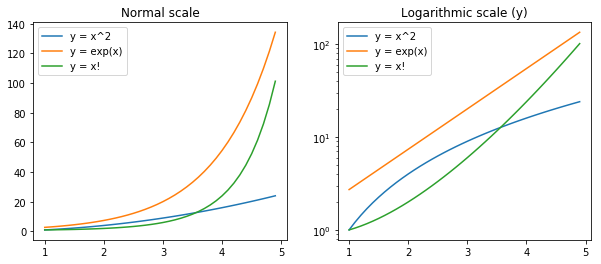

In [4]:
fig, axes = plt.subplots(1, 2, figsize=(10,4))
      
# help(axes[0].plot)
axes[0].plot(x, x**2, x, np.exp(x), x, scipy.special.factorial(x))
axes[0].set_title("Normal scale")
axes[0].legend(['y = x^2', 'y = exp(x)', 'y = x!'], loc=0)

axes[1].plot(x, x**2, x, np.exp(x), x, scipy.special.factorial(x))
axes[1].set_yscale("log")
axes[1].set_title("Logarithmic scale (y)")
axes[1].legend(['y = x^2', 'y = exp(x)', 'y = x!'], loc=0)

NOTE: I used `scipy.special.factorial` above that take in input an numpy array and outputs an array with factorial of each term

### Placement of ticks and custom tick labels

We can explicitly determine where we want the axis ticks with `set_xticks` and `set_yticks`, which both take a list of values for where on the axis the ticks are to be placed. We can also use the `set_xticklabels` and `set_yticklabels` methods to provide a list of custom text labels for each tick location:

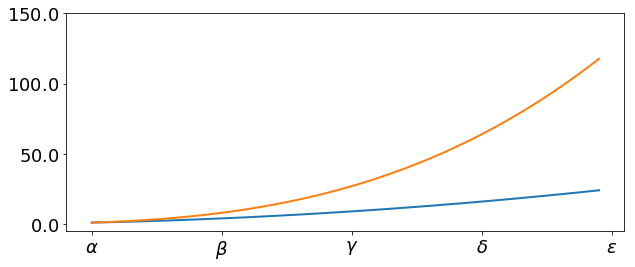

In [5]:
fig, ax = plt.subplots(figsize=(10, 4))

ax.plot(x, x**2, x, x**3, lw=2)

ax.set_xticks([1, 2, 3, 4, 5])
ax.set_xticklabels([r'$\alpha$', r'$\beta$', r'$\gamma$', r'$\delta$', r'$\epsilon$'], fontsize=18)

yticks = [0, 50, 100, 150]
ax.set_yticks(yticks)
ax.set_yticklabels(["$%.1f$" % y for y in yticks], fontsize=18); # use LaTeX formatted labels

There are a number of more advanced methods for controlling major and minor tick placement in matplotlib figures, such as automatic placement according to different policies. See http://matplotlib.org/api/ticker_api.html for details.

#### Scientific notation

With large numbers on axes, it is often better use scientific notation:

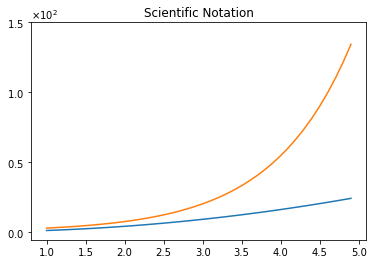

In [6]:
fig, ax = plt.subplots(1, 1)
      
ax.plot(x, x**2, x, np.exp(x))
ax.set_title("Scientific Notation")

ax.set_yticks([0, 50, 100, 150])

from matplotlib import ticker
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True) 
formatter.set_powerlimits((-1,1)) 
ax.yaxis.set_major_formatter(formatter) 

### Axis number and axis label spacing

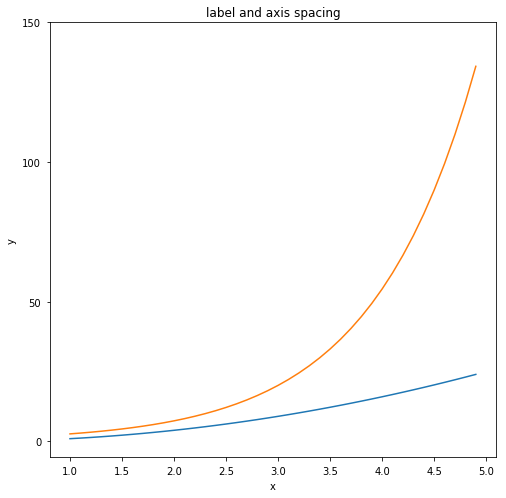

In [7]:
import matplotlib

# distance between x and y axis and the numbers on the axes
matplotlib.rcParams['xtick.major.pad'] = 5
matplotlib.rcParams['ytick.major.pad'] = 5

fig, ax = plt.subplots(1, 1, figsize=(8, 8))
      
ax.plot(x, x**2, x, np.exp(x))
ax.set_yticks([0, 50, 100, 150])

ax.set_title("label and axis spacing")

# padding between axis label and axis numbers
ax.xaxis.labelpad = 5
ax.yaxis.labelpad = 5

ax.set_xlabel("x")
ax.set_ylabel("y");

In [8]:
# restore defaults
matplotlib.rcParams['xtick.major.pad'] = 3
matplotlib.rcParams['ytick.major.pad'] = 3

#### Axis position adjustments

Unfortunately, when saving figures the labels are sometimes clipped, and it can be necessary to adjust the positions of axes a little bit. This can be done using `subplots_adjust`:

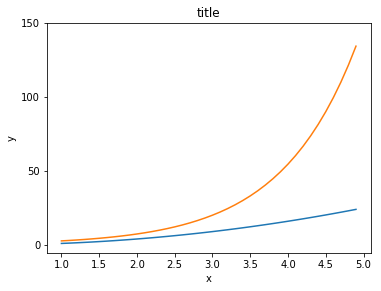

In [9]:
fig, ax = plt.subplots(1, 1)
      
ax.plot(x, x**2, x, np.exp(x))
ax.set_yticks([0, 50, 100, 150])

ax.set_title("title")
ax.set_xlabel("x")
ax.set_ylabel("y")

fig.subplots_adjust(left=0.15, right=.9, bottom=0.1, top=0.9);

### Axis grid

With the `grid` method in the axis object, we can turn on and off grid lines. We can also customize the appearance of the grid lines using the same keyword arguments as the `plot` function:

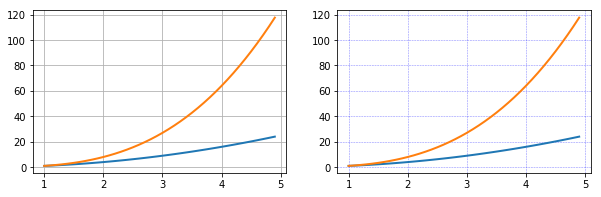

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(10,3))

# default grid appearance
axes[0].plot(x, x**2, x, x**3, lw=2)
axes[0].grid(True)

# custom grid appearance
axes[1].plot(x, x**2, x, x**3, lw=2)
axes[1].grid(color='b', alpha=0.5, linestyle='dashed', linewidth=0.5)

### Axis spines

We can also change the properties of axis spines:

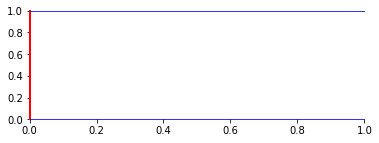

In [11]:
fig, ax = plt.subplots(figsize=(6,2))

ax.spines['bottom'].set_color('blue')
ax.spines['top'].set_color('blue')

ax.spines['left'].set_color('red')
ax.spines['left'].set_linewidth(2)

# turn off axis spine to the right
ax.spines['right'].set_color("none")
ax.yaxis.tick_left() # only ticks on the left side

### Twin axes

Sometimes it is useful to have dual x or y axes in a figure; for example, when plotting curves with different units together. Matplotlib supports this with the `twinx` and `twiny` functions:

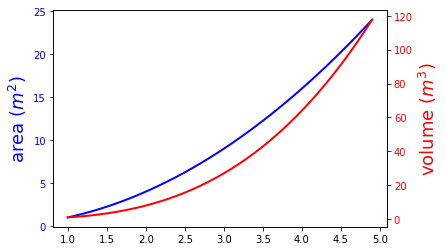

In [12]:
fig, ax1 = plt.subplots()

ax1.plot(x, x**2, lw=2, color="blue")
ax1.set_ylabel(r"area $(m^2)$", fontsize=18, color="blue")
for label in ax1.get_yticklabels():
    label.set_color("blue")
    
ax2 = ax1.twinx()
ax2.plot(x, x**3, lw=2, color="red")
ax2.set_ylabel(r"volume $(m^3)$", fontsize=18, color="red")
for label in ax2.get_yticklabels():
    label.set_color("red")

### Axes where x and y is zero

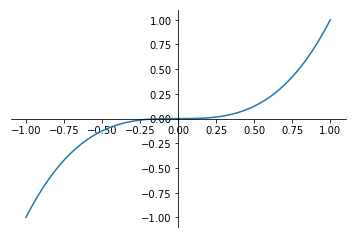

In [13]:
fig, ax = plt.subplots()

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0)) # set position of x spine to x=0

ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))   # set position of y spine to y=0

xx = np.linspace(-1.0, 1.0, 100)
ax.plot(xx, xx**3);

### Other 2D plot styles

In addition to the regular `plot` method, there are a number of other functions for generating different kind of plots. See the matplotlib plot gallery for a complete list of available plot types: http://matplotlib.org/gallery.html. Some of the more useful ones are show below:

In [14]:
n = np.array([0,1,2,3,4,5])

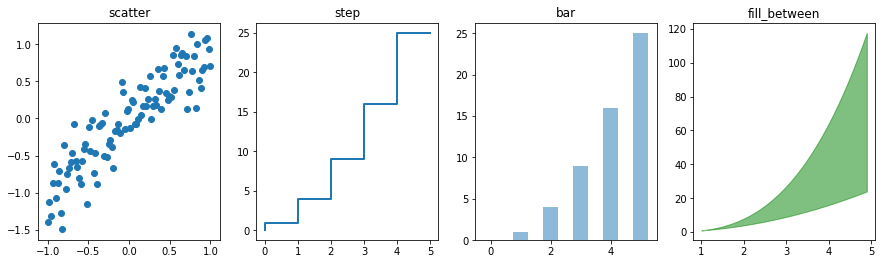

In [15]:
fig, axes = plt.subplots(1, 4, figsize=(15,4))

axes[0].scatter(xx, xx + 0.25*np.random.randn(len(xx)))
axes[0].set_title("scatter")

axes[1].step(n, n**2, lw=2)
axes[1].set_title("step")

axes[2].bar(n, n**2, align="center", width=0.5, alpha=0.5)
axes[2].set_title("bar")

axes[3].fill_between(x, x**2, x**3, color="green", alpha=0.5);
axes[3].set_title("fill_between");

### Text annotation

Annotating text in matplotlib figures can be done using the `text` function. It supports LaTeX formatting just like axis label texts and titles:

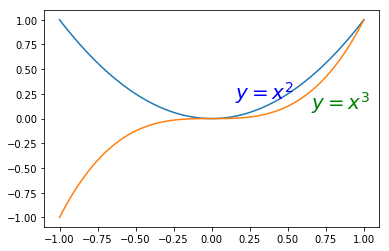

In [16]:
fig, ax = plt.subplots()

ax.plot(xx, xx**2, xx, xx**3)

ax.text(0.15, 0.2, r"$y=x^2$", fontsize=20, color="blue")
ax.text(0.65, 0.1, r"$y=x^3$", fontsize=20, color="green");

### Figures with multiple subplots and insets

Axes can be added to a matplotlib Figure canvas manually using `fig.add_axes` or using a sub-figure layout manager such as `subplots`, `subplot2grid`, or `gridspec`:

#### subplots

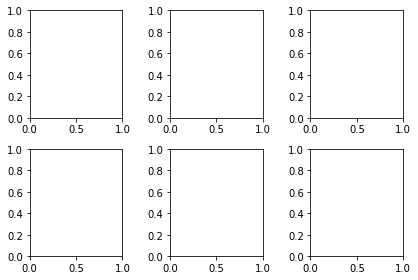

In [17]:
fig, ax = plt.subplots(2, 3)
fig.tight_layout()

#### subplot2grid

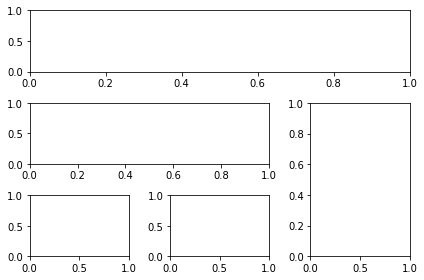

In [18]:
fig = plt.figure()
ax1 = plt.subplot2grid((3,3), (0,0), colspan=3)
ax2 = plt.subplot2grid((3,3), (1,0), colspan=2)
ax3 = plt.subplot2grid((3,3), (1,2), rowspan=2)
ax4 = plt.subplot2grid((3,3), (2,0))
ax5 = plt.subplot2grid((3,3), (2,1))
fig.tight_layout()

#### gridspec

In [19]:
import matplotlib.gridspec as gridspec

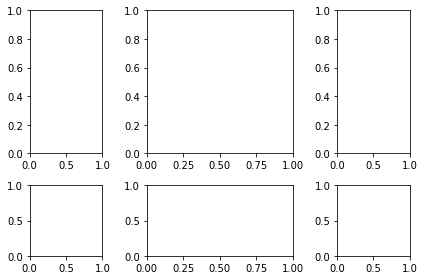

In [20]:
fig = plt.figure()

gs = gridspec.GridSpec(2, 3, height_ratios=[2,1], width_ratios=[1,2,1])
for g in gs:
    ax = fig.add_subplot(g)
    
fig.tight_layout()

#### add_axes

Manually adding axes with `add_axes` is useful for adding insets to figures:

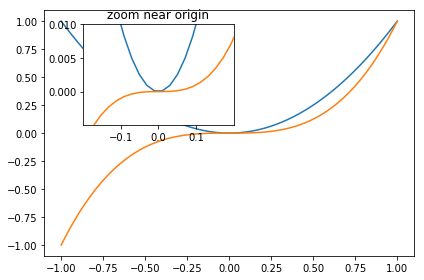

In [21]:
fig, ax = plt.subplots()

ax.plot(xx, xx**2, xx, xx**3)
fig.tight_layout()

# inset
inset_ax = fig.add_axes([0.2, 0.55, 0.35, 0.35]) # X, Y, width, height

inset_ax.plot(xx, xx**2, xx, xx**3)
inset_ax.set_title('zoom near origin')

# set axis range
inset_ax.set_xlim(-.2, .2)
inset_ax.set_ylim(-.005, .01)

# set axis tick locations
inset_ax.set_yticks([0, 0.005, 0.01])
inset_ax.set_xticks([-0.1,0,.1]);

## Further reading

* http://www.matplotlib.org - The project web page for matplotlib.
* https://github.com/matplotlib/matplotlib - The source code for matplotlib.
* http://matplotlib.org/gallery.html - A large gallery showcaseing various types of plots matplotlib can create. Highly recommended! 
* http://www.loria.fr/~rougier/teaching/matplotlib - A good matplotlib tutorial.
* http://scipy-lectures.github.io/matplotlib/matplotlib.html - Another good matplotlib reference.
